## Basic Pandas Concepts

Some very basic Pandas and python concepts to review.

#### Import the pandas package

In [ ]:
import pandas as pd

#### Create a simple DataFrame

- syntax: pd.DataFrame({column1 : value1, column2 : value2, column3 : value3})

You can have anything as column names and anything as values.

The only requirement is to have all value lists being of equal length (all are of length 3 in this example)

There are many ways to create a data frame and you will see some more during the course. All of them can be seen documented [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [ ]:
df = pd.DataFrame({'name':['Bob','Jen','Tim'],
                   'age':[20,30,40],
                   'pet':['cat', 'dog', 'bird']})

df

,name,age,pet
0,Bob,20,cat
1,Jen,30,dog
2,Tim,40,bird


#### View the column names and index values

The index is one of the most important concepts in pandas.

Each dataframe has only a single index which is always available as `df.index` and if you do not supply one (as we did not for this dataframe) a new one is made automatically.

Indexes define how to access rows of the dataframe.

The simplest index is the range index but there are more complex ones like interval index, datetime index and multi index.

We will explore indexes more in depth during the course of this lecture.

In [ ]:
print(df.columns)
print(df.index)

Index(['name', 'age', 'pet'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


#### Select a column by name in 2 different ways

These two ways are equivalent and can be used interchangeably almost always.

The primary exception is when the name of the column contains spaces. If for example we had a column called "weekly sales" we have to use df['weekly sales'] because `df.weekly sales` is a syntactic error.

In [ ]:
print(df['name'])
print(df.name)

0    Bob
1    Jen
2    Tim
Name: name, dtype: object
0    Bob
1    Jen
2    Tim
Name: name, dtype: object


#### Select multiple columns

To select multiple columns we use `df[columns_to_select]` where `columns_to_select` are the columns we are interested in given as a simple python list. As the result we will get another data frame.

This is the equivalent of listing columns names in `SELECT` part of a sql query.

In [ ]:
df[['name','pet']]

,name,pet
0,Bob,cat
1,Jen,dog
2,Tim,bird


#### Select a row by index

Regular selection of rows goes via its index. When using range indices we can access rows using integer indices but this will not work when using datetime index for example.

We can always access any row in the dataframe using `.iloc[i]` for some integer i.

The result is a series object from which we can access values by using column indexing.

In [ ]:
df.iloc[0]

,0
name,Bob
age,20
pet,cat


### Sort Function

- pandas.pydata.org
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

#### Sort the data by pet

There are two ways to sort.
- By index
- By value

By value means sorting according to value in a column.

In this example we sort the rows of the dataframe based on values in 'pet' column.

The parameter `ascending = True` means that we want the rows sorted in ascending order. This is the same as sql 'ASC'. To get descending order use `ascending = False`.

`inplace` is very important and you should always remember it. When `inplace=True` the dataframe is modified in place which means that no copies are made and your previous data stored in the dataframe is lost. By default inplace is always False. When it is false a copy is made of your data and that copy is sorted and returned as output.

The output of `sort_values` is always a dataframe returned but the behaviour depends strongly on the `inplace` parameter.

In [ ]:
df.sort_values('pet',inplace=True, ascending=True)

### Indexing with DataFrames

Everything we discussed about indexing in numpy arrays applies to dataframes as well.

DataFrames are very similar to 2d-arrays with the main exception being that in DataFrames you can index using strings (column names).

#### View the index after the sort

In [ ]:
df

,name,age,pet
2,Tim,40,bird
0,Bob,20,cat
1,Jen,30,dog


#### Difference between loc and iloc

- `.loc` selection is based on the value of the index. For example if the index was categorical we could index via some category.
- `.iloc` selection is **always** based on integer positions. When using iloc we are treating the dataframe as 2d-array with no special structure compared to the case of `.loc`

In [ ]:
df.loc[0] #index based

,0
name,Bob
age,20
pet,cat


In [ ]:
df.iloc[0] #relative position based indexing

,2
name,Tim
age,40
pet,bird


#### Use iloc to select all rows of a column

This will select all rows of the second column.

Remember `:` = `::1`

First index is always row and second is always column when dealing with dataframes.

In [ ]:
df.iloc[:,2]

,pet
2,bird
0,cat
1,dog


#### Use iloc to select the last row

In [ ]:
df.iloc[-1,:]

,1
name,Jen
age,30
pet,dog


# Basic Pandas Functionality

Before we learn about what Pandas can do, we need to first import some data

## Importing Data

Python allows you to connect to any type of database. To make this easy for newbies, we've create a notebook to help you connect to the Strata Scratch platform and pull data. Use the notebook below to pull data from our database.

[Connect to Strata Scratch with Python](https://colab.research.google.com/drive/1VtywiAAI-ucfTzBa6YDca8k4gfGiEPnn)

### Install the Database Module

The code below installs a postgres database module to allow our notebook to connect to the Strata Scratch database



In [2]:
!pip install psycopg2

### Import Required Modules

Import a few required modules that enables us to query data and perform analytics

In [3]:
import numpy as np
import pandas as pd
import psycopg2 as ps

### Connect to Strata Scratch

Make sure to enter your username and database password. Your database password is not the same as your login password. You can find your database password in the Profile tab once logged into Strata Scratch.

In [ ]:
host_name = 'db-strata.stratascratch.com'
dbname = 'db_strata'
port = '5432'
user_name = '' #enter username
pwd = '' #enter your database password found in the profile tab in Strata Scratch

try:
    conn = ps.connect(host=host_name,database=dbname,user=user_name,password=pwd,port=port)
except ps.OperationalError as e:
    raise e
else:
    print('Connected!')

OperationalError: could not translate host name "db-strata.stratascratch.com" to address: Name or service not known


### Pull the Titanic Dataset From Strata Scratch

#### Enter SQL code below to pull the dataset you're interested in

If you get an error, it likely means that the connection timed out. Try connecting to Strata Scratch again before executing the code below.

A list of datasets is found in SQL LAB in Strata Scratch.

In [ ]:
#Write SQL below to pull datasets
cur = conn.cursor()
cur.execute("""
            SELECT *  FROM titanic;
            """)
data = cur.fetchall()
colnames = [desc[0] for desc in cur.description]
conn.commit()

#create the pandas dataframe
data = pd.DataFrame(data)
data.columns = colnames

#close the connection
cur.close()

NameError: name 'conn' is not defined

#### Check To See If Your Pulled The Dataset

The Titanic dataset should be in a pandas dataframe named `data`

In [ ]:
data.head()

In [ ]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Foldah/TitanicDS.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Basic Pandas Functionality

Now that we imported some data, let's take a look at what Pandas can do

#### Investigate the first few rows of data

The `head` method by default prints the first 5 rows of your dataframe.

If you pass it a parameter `n` it will print first `n` rows.

The docs are [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Investigate the last 10 rows of data

tail is similar to head except it prints the last `n` rows.

In [7]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


#### Investigate the data types in the DataFrame

This method will tell you the types of columns.

Types are automatically inferred by pandas and usually you do not have to worry about them.

[docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Get some summary statistics

To learn more about describe visit [this link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Filtering Dataframes

You can filter data based on the columns and values in the dataframe

#### Filter the data for men

There are two pieces of the puzzle here:
- `data.sex=='male'` will give a boolean array where True means that row has a column called sex which has value 'male'. This numpy array is called the predicate.
- data[data.sex=='male'] will give back all rows for which the predicate holds true.

The result of this filter is a dataframe with same columns as the input dataframe.

In [10]:
data[data.Sex=='male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Filter the ages for the men

Again there are two important parts:
- `data.sex=='male'` is the predicate as before
- `data.age` means taking the values for the age column, and `data.age[data.sex=='male']` means taking all ages which are related to male rows.

The result of this is pandas series **not** a dataframe.

In [11]:
data.Age[data.Sex=='male']

,Age
0,22.0
4,35.0
5,NaN
6,54.0
7,2.0
...,...
883,28.0
884,25.0
886,27.0
889,26.0


### Adding methods to filters

A method is a function and is used frequently when analyzing data in Pandas. There are countless Pandas methods. We'll go over a few of the basic ones to show how you can use methods to quickly analyze your data.

#### How many men and women were on the Titanic?

The pipeline always goes the same way
- Predicate is evalatued
- Data is filtered according to a predicate
- An aggregate value is computed after the filtering.

The count method simply counts the number of frames in the dataframe.

In [12]:
data.Sex[data.Sex=='male'].count()


np.int64(577)

In [13]:
data.Sex[data.Sex=='female'].count()

np.int64(314)

#### What was the survival rate for adult men (age>=18)

Here we combine predicates using the and operator (&).

This operator applies the logical and operation between elements at matching positions.

For example:
- x = np.array([True, False, True, True])
- y = np.array([False, True, False, True])
- will give x & y = np.array([True & False, False & True, True & False, True & True]).

In the following example we use the or combiner (|).

You can combine any two boolean numpy arrays as long as they have the same shape using the & and | operators.

Combining regular python lists this way does not work.

In [16]:
data.Survived[(data.Sex=='male')&(data.Age>=18)].mean()

np.float64(0.17721518987341772)

#### What was the survival rate for women and children?

The mean method is the same as AVERAGE in SQL.

In [17]:
data.Survived[(data.Sex=='female')|(data.Age<18)].mean()

np.float64(0.6881720430107527)

#### Use groupby to compare the survival rates of men and women

The `groupby` method is one of the most important tools you will use in your day to day work.

It's main input parameter is either a string denoting a column name or a list of strings denoting a list of column names.

It's output is a GroupBy object which is very similar to a dataframe.

The operation of groupby is the same as SQL GROUPBY.

For more info see the [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).

In [19]:
data.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### Create a DataFrame with groupby

In [21]:
new = data.groupby(['Sex','Pclass'])[['Survived','Age']].mean()
new

Survived        Age
Sex    Pclass                     
female 1       0.968085  34.611765
       2       0.921053  28.722973
       3       0.500000  21.750000
male   1       0.368852  41.281386
       2       0.157407  30.740707
       3       0.135447  26.507589

## Importing and Exporting Data with Pandas

#### Pandas has easy to use functions for importing and exporting different data types:
- CSV Files
- Excel Worksheets
- Queries from Databases

Strata Scratch notebooks will exclusively be import data from our platform so we will not be covering other import techniques.

### **Seatwork 6.1 Reviewing Data Analysis Tools**

1. Given the following data structures:

    sales = [100,130,119,92,35]

    customer_account = ['B100','J101','X102','P103','R104']

    city = ['BOS','LA','NYC','SF','CHI']

*  Create a DataFrame with the data above

In [ ]:
sales = [100, 130, 119, 92, 35]
customer_account = ['B100', 'J101', 'X102', 'P103', 'R104']
city = ['BOS', 'LA', 'NYC', 'SF', 'CHI']

df = pd.DataFrame({
    'sales': sales,
    'customer_account': customer_account,
    'city': city
})

print("Created DataFrame:")
print(df)


Created DataFrame:
   sales customer_account city
0    100             B100  BOS
1    130             J101   LA
2    119             X102  NYC
3     92             P103   SF
4     35             R104  CHI


*  What is the name of the first column?

In [ ]:
first_column = df.columns[0]
print(f"Name of the first column: {first_column}")

Name of the first column: sales


*  Sort the DataFrame by city in descending order (check the documentation for sort)

In [ ]:
df_sorted = df.sort_values('city', ascending=False)
print("DataFrame sorted by city (descending):")
print(df_sorted)

DataFrame sorted by city (descending):
   sales customer_account city
3     92             P103   SF
2    119             X102  NYC
1    130             J101   LA
4     35             R104  CHI
0    100             B100  BOS


*  Which customer is in the last row of the DataFrame?

In [ ]:
df_sorted = df.sort_values('city', ascending=False)

last_customer = df_sorted.iloc[-1]['customer_account']
print(f"Customer in the last row (after sorting): {last_customer}")
print("\nDataFrame after sorting:")
print(df_sorted)

Customer in the last row (after sorting): B100

DataFrame after sorting:
   sales customer_account city
3     92             P103   SF
2    119             X102  NYC
1    130             J101   LA
4     35             R104  CHI
0    100             B100  BOS


*  Reorder the columns with customer in the first column

In [ ]:
df_reordered = df[['customer_account', 'sales', 'city']]
print("DataFrame with customer_account as first column:")
print(df_reordered)

DataFrame with customer_account as first column:
  customer_account  sales city
0             B100    100  BOS
1             J101    130   LA
2             X102    119  NYC
3             P103     92   SF
4             R104     35  CHI


## More Basic Pandas Exercises

#### What was the average age of the survivors?

In [ ]:
survivors = data[data['Survived'] == 1]

avg_age_survivors = survivors['Age'].mean()

print(f"Average age of survivors: {avg_age_survivors:.2f} years")
print(f"Total survivors: {len(survivors)}")
print(f"Survivors with known age: {survivors['Age'].notna().sum()}")

Average age of survivors: 28.34 years
Total survivors: 342
Survivors with known age: 290


#### What was the combined survival rate of both children (age less than 18) and seniors (age greater than 60)?

In [ ]:
children = data[data['Age'] < 18]
seniors = data[data['Age'] > 60]

children_and_seniors = pd.concat([children, seniors])

children_and_seniors = children_and_seniors.drop_duplicates(subset=['PassengerId'])

survived = children_and_seniors['Survived'].sum()
survival_rate = (survived / total) * 100

print(f"Total children and seniors: {total}")
print(f"Survived: {survived}")
print(f"Survival rate: {survival_rate:.2f}%")

Total children and seniors: 135
Survived: 66
Survival rate: 48.89%


#### Group by pClass and investigate average survival rate, age and fare

In [ ]:
pclass_stats = data.groupby('Pclass').agg({
    'Survived': 'mean',
    'Age': 'mean',
    'Fare': 'mean'
})

pclass_stats.columns = ['Survival Rate', 'Average Age', 'Average Fare']

pclass_stats['Survival Rate'] = pclass_stats['Survival Rate'] * 100

print("Analysis by Passenger Class:")
print(pclass_stats.round(2))

Analysis by Passenger Class:
        Survival Rate  Average Age  Average Fare
Pclass                                          
1               62.96        38.23         84.15
2               47.28        29.88         20.66
3               24.24        25.14         13.68


#### Create a CSV with the names and ages of the surivors and another CSV file with the names and ages of the deceased. Please refer to documention (to_csv method) to complete the exercise.

[Documentation for the method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

In [ ]:
survivors = data[data['Survived'] == 1][['Name', 'Age']]
deceased = data[data['Survived'] == 0][['Name', 'Age']]

# Save to CSV files
survivors.to_csv('/content/drive/MyDrive/Foldah/survivors.csv', index=False)
deceased.to_csv('/content/drive/MyDrive/Foldah/deceased.csv', index=False)

print(f"Survivors CSV created: {len(survivors)} passengers")
print(f"Deceased CSV created: {len(deceased)} passengers")
print("\nFirst 5 survivors:")
print(survivors.head())
print("\nFirst 5 deceased:")
print(deceased.head())

Survivors CSV created: 342 passengers
Deceased CSV created: 549 passengers

First 5 survivors:
                                                Name   Age
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0
9                Nasser, Mrs. Nicholas (Adele Achem)  14.0

First 5 deceased:
                             Name   Age
0         Braund, Mr. Owen Harris  22.0
4        Allen, Mr. William Henry  35.0
5                Moran, Mr. James   NaN
6         McCarthy, Mr. Timothy J  54.0
7  Palsson, Master. Gosta Leonard   2.0


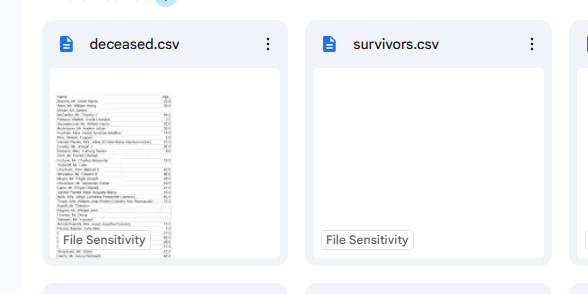